# Set Up

In [206]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import math

In [129]:
case = "2D"
numberOfCases = 2
days = 20
data_path = "../Data/"
#sponge 
cases = [f"sim{case}{i}" for i in range(1, numberOfCases + 1)]
casenames = [f"sim{case}{i}-{days}" for i in range(1, numberOfCases + 1)]

print(f"loading cases {casenames}")

ncs = []

for casename in casenames:
    nc_file = f"{data_path}{casename}_averages.nc"
    ds_avg = xr.open_dataset(nc_file).load()
    ncs.append(ds_avg)


loading cases ['sim2D1-20', 'sim2D2-20']


In [183]:
# Load variables
N02 = 9e-5
f = 1e-4
inertial_period = (2*math.pi)/f #s

# Buoyancy Profile

In [138]:
index = 1                  # 0 -> 2D1, 1 -> 2D2, ...
data_set = cases[index]
ds_avg = ncs[index]

print(f"Using data set: {data_set}")

Using data set: sim2D2


## Initial

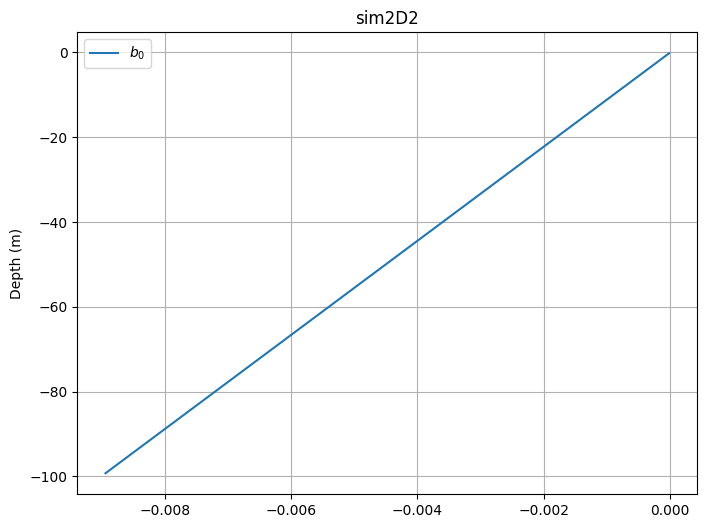

In [139]:
plt.figure(figsize=(8, 6))
plt.plot(ds_avg.b.isel(time=0), ds_avg.zC, label=f"$b_0$")
plt.ylabel('Depth (m)')
plt.legend()
plt.title(data_set)
plt.grid()
plt.show()

## Evolution

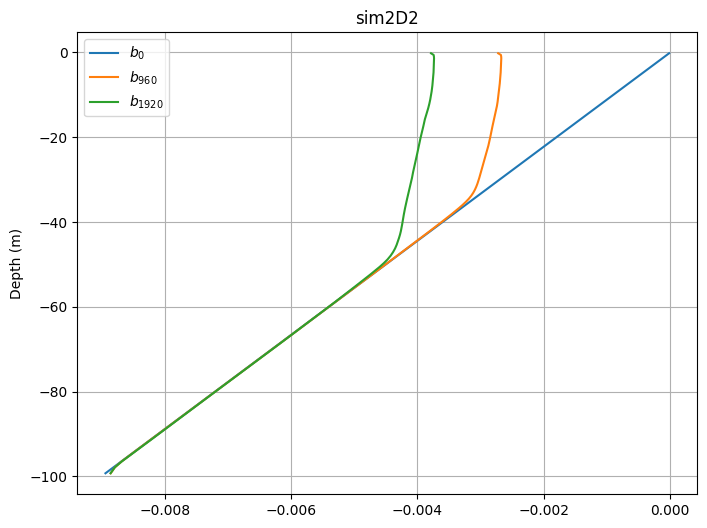

In [140]:
final_time = len(ds_avg.b)-1
middle_time = int(round((final_time) / 2))

plt.figure(figsize=(8, 6))
plt.plot(ds_avg.b.isel(time=0).values, ds_avg.zC, label=f"$b_0$")
plt.plot(ds_avg.b.isel(time=middle_time).values, ds_avg.zC, label=f"$b_{{{middle_time}}}$")
plt.plot(ds_avg.b.isel(time=final_time).values, ds_avg.zC, label=f"$b_{{{final_time}}}$")
plt.ylabel('Depth (m)')
plt.legend()
plt.title(data_set)
plt.grid()
plt.show()

## Evolution Movie

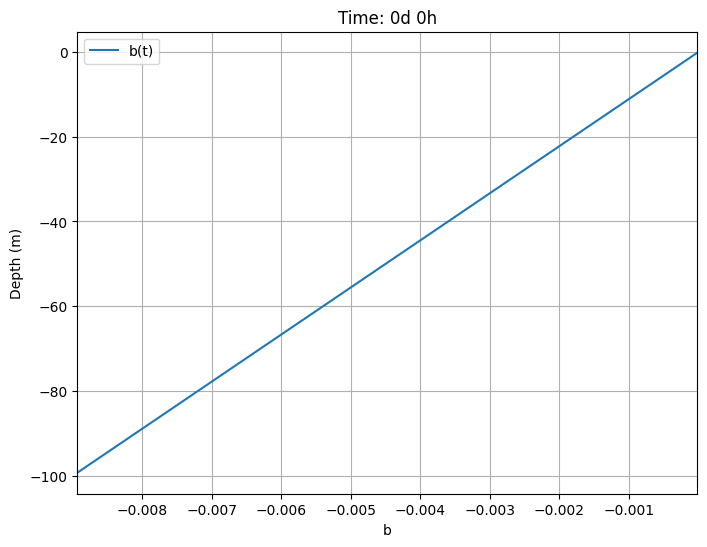

In [70]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

min_value = ds_avg.b.min()
max_value = ds_avg.b.max()

# Define a function to update the plot for each frame
def update(frame):
    ax.cla()  # Clear the current axis
    ax.plot(ds_avg.b.isel(time=frame), ds_avg.zC, label="b(t)")
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('b')
    ax.legend()
    ax.grid()
    
    # Convert time to days, hours, and minutes
    time_in_seconds = pd.to_timedelta(ds_avg.time[frame].values, unit='s')
    days = time_in_seconds.days
    hours, remainder = divmod(time_in_seconds.seconds, 3600)

    ax.set_title(f'{data_set} at time: {days}d {hours}h')
    
    ax.set_xlim(min_value, max_value)

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=len(ds_avg.time), interval=100, repeat=False)

# Save the animation as a GIF
ani.save(f'images/buoyancy-evaluation-{data_set}.gif', writer='pillow')

# Figure 2

Evolution of the buoyancy frequency normalized by the initial value for a simulation of upright convection (simulation 2D1) and convection at a density front (simulation 2D2).

In [144]:
index = 0                  # 0 -> 2D1, 1 -> 2D2, ...
data_set = cases[index]
ds_avg1 = ncs[index]

print(f"Using data set: {data_set}")

index = 1                  # 0 -> 2D1, 1 -> 2D2, ...
data_set = cases[index]
ds_avg2 = ncs[index]

print(f"Using data set: {data_set}")

Using data set: sim2D1
Using data set: sim2D2


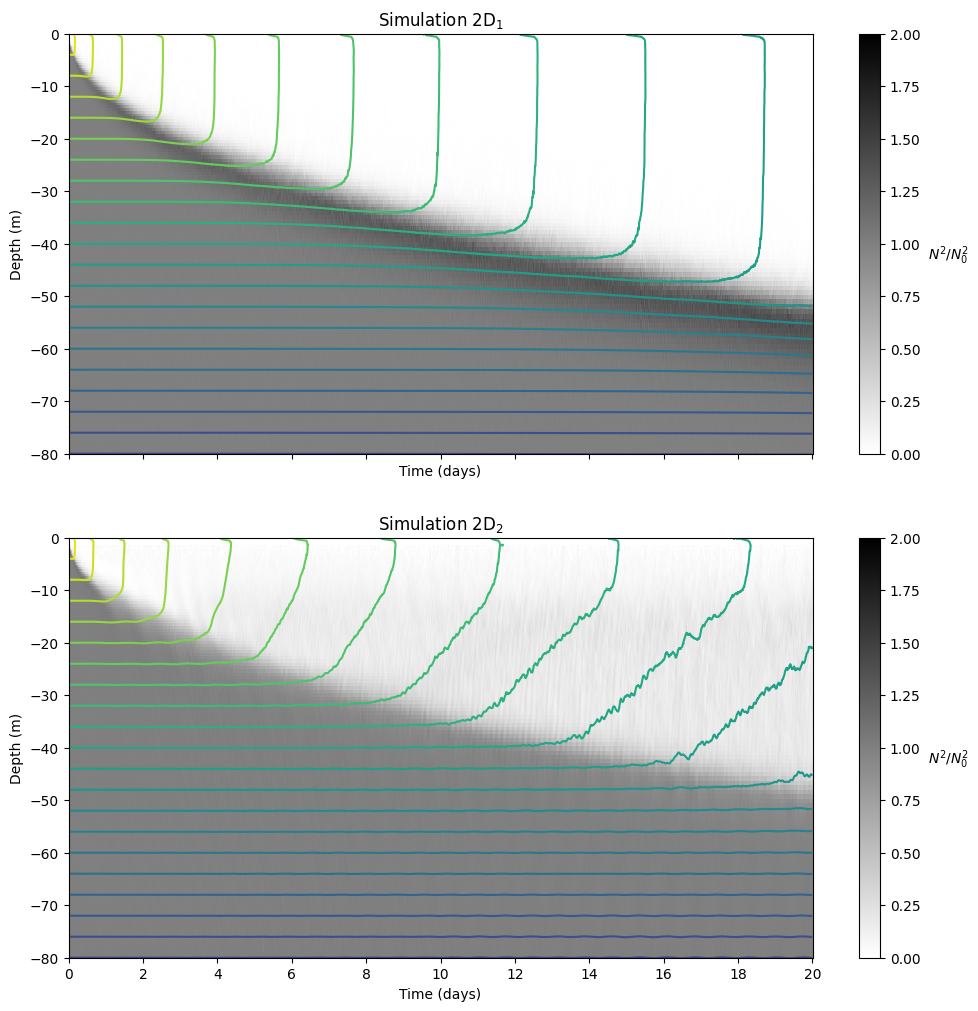

In [145]:
figure_name = "Figure 2"
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)

# Plot for ds_avg1
ax1 = axes[0]

N2_1 = ds_avg1['N2']
time_1 = N2_1.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days
depth_1 = N2_1.coords['zF'].values
N2_values_1 = N2_1.values / N02

contourf_1 = ax1.pcolormesh(time_1, depth_1, N2_values_1.T, cmap='gray_r', vmin=0, vmax=2)
cbar_1 = plt.colorbar(contourf_1, ax=ax1)
cbar_1.set_label(r'$N^2 / N_0^2$', rotation=0, labelpad=20)

contour_1 = ax1.contour(time_1, ds_avg1.b.zC, ds_avg1.b[:, :, 0].T / N02, levels=25, cmap='viridis')

ax1.set_title(r'Simulation 2D$_1$')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(-80, 0)

# Set x-axis ticks to increments of 2 days
time_min = np.floor(time_1.min())
time_max = np.ceil(time_1.max())
ax1.set_xticks(np.arange(time_min, time_max + 2, 2))

# Plot for ds_avg2
ax2 = axes[1]
N2_2 = ds_avg2['N2']
time_2 = N2_2.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days
depth_2 = N2_2.coords['zF'].values
N2_values_2 = N2_2.values / N02

contourf_2 = ax2.pcolormesh(time_2, depth_2, N2_values_2.T, vmin=0, vmax=2, cmap='gray_r')
cbar_2 = plt.colorbar(contourf_2, ax=ax2)
cbar_2.set_label(r'$N^2 / N_0^2$', rotation=0, labelpad=20)

contour_2 = ax2.contour(ds_avg2.b.time / np.timedelta64(1, 'D'), ds_avg2.b.zC, ds_avg2.b[:, :, 0].T / N02, levels=25, cmap='viridis')

ax2.set_title(r'Simulation 2D$_2$')
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(-80, 0)

# Set x-axis ticks to increments of 2 days
time_min = np.floor(time_2.min())
time_max = np.ceil(time_2.max())
ax2.set_xticks(np.arange(time_min, time_max + 2, 2))

# Save the figure
plt.savefig(f"images/{figure_name}.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

#  Buoyancy frequency and bulk Richardson 

## Figure 3

(a) Buoyancy frequency and (b) bulk Richardson number averaged in $x$ and for $1$ inertial period centered at $t = 15$ days.

In [166]:
num_simulations = 2
figure_name = "Figure 3"

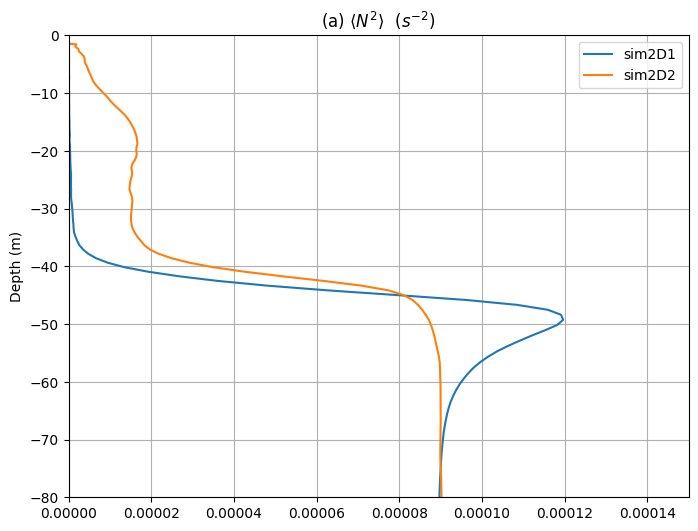

In [184]:
# Compute the mean of one inertial period centered at day 15
inertial_period_days = inertial_period / (24 * 3600)

center_day = 15
start_day = center_day - inertial_period_days / 2
end_day = center_day + inertial_period_days / 2
time_in_days = ds_avg['time'].values / np.timedelta64(1, 'D')

time_mask = (time_in_days >= start_day) & (time_in_days <= end_day)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(0,num_simulations):
    ds_avg = ncs[i]
    ds_selected = ds_avg.N2.isel(time=time_mask)
    ds_mean = ds_selected.mean(dim='time')
    ax.plot(ds_mean, ds_avg.zF, label=f"{cases[i]}")


ax.set_ylabel('Depth (m)')
ax.legend()
ax.set_title(f"(a) $\\left\\langle N^2 \\right\\rangle ~~ (s^{{-2}})$")
ax.grid()
ax.set_ylim(-80, 0)
ax.set_xlim(0,15e-5)

plt.savefig(f"images/{figure_name}.png", dpi=300, bbox_inches='tight')

## Buoyancy Frequency Evolution Movie

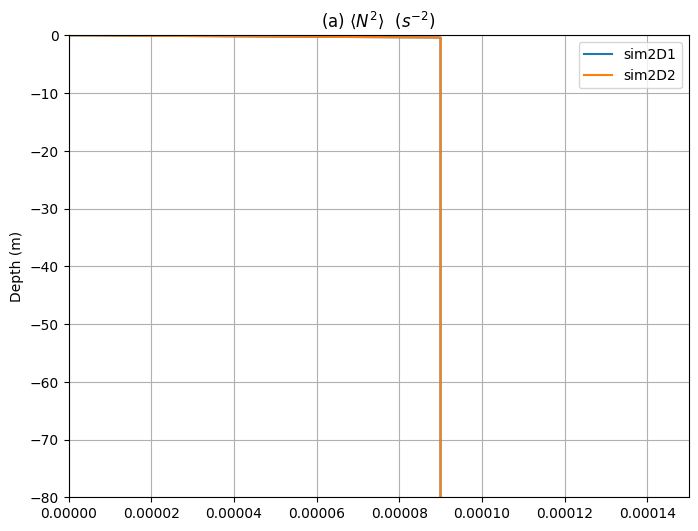

In [173]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define a function to update the plot for each frame
def update(frame):
    ax.cla()  # Clear the current axis
    for i in range(0,num_simulations):
        ds_avg = ncs[i]
        ax.plot(ds_avg.N2.isel(time=frame), ds_avg.zF, label=f"{cases[i]}")
    
    # Convert time to days, hours, and minutes
    time_in_seconds = pd.to_timedelta(ds_avg.time[frame].values, unit='s')
    days = time_in_seconds.days
    hours, remainder = divmod(time_in_seconds.seconds, 3600)

    ax.set_ylabel('Depth (m)')
    ax.legend()
    ax.set_title(f"(a) $\\left\\langle N^2 \\right\\rangle ~~ (s^{{-2}})$ at time: {days}d {hours}h")
    ax.grid()
    ax.set_ylim(-80, 0)
    ax.set_xlim(0,15e-5)

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=len(ds_avg.time), interval=100, repeat=False)

# Save the animation as a GIF
ani.save(f'images/buoyancy-frequency-evaluation.gif', writer='pillow')

# Mean Velocities

## Figure 5

Simulation 2D2: (a) Mean cross-front velocity, (b) mean alongfront velocity, and (c) hodograph of the mean velocity vectors (all m s−1). All quantities are averaged in x and for 1 inertial period centered at t = 15 days.

In [174]:
index = 1                  # 0 -> 2D1, 1 -> 2D2, ...
data_set = cases[index]
ds_avg1 = ncs[index]

print(f"Using data set: {data_set}")

Using data set: sim2D2


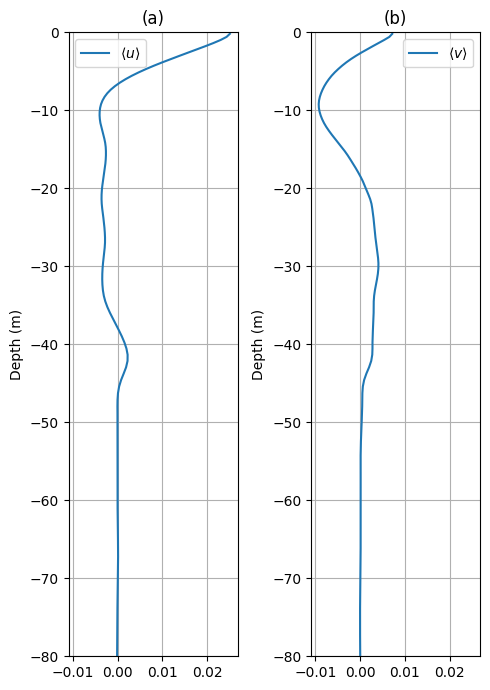

In [247]:
# Compute the mask for one inertial period centered at day 15
inertial_period_days = inertial_period / (24 * 3600)    # convert to days

center_day = 15
start_day = center_day - inertial_period_days / 2
end_day = center_day + inertial_period_days / 2
time_in_days = ds_avg['time'].values / np.timedelta64(1, 'D')

time_mask = (time_in_days >= start_day) & (time_in_days <= end_day)

ds_selected_u = ds_avg.u.sel(time=time_mask)
ds_mean_u = ds_selected_u.mean(dim='time')

ds_selected_v = ds_avg.v.sel(time=time_mask)
ds_mean_v = ds_selected_v.mean(dim='time').sel(yF=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 7), sharex=True) 
# plotting <u>
ax1 = axes[0]
ax1.plot(ds_mean_u, ds_avg.zC, label="$\langle u \\rangle$")
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(-80, 0)
ax1.legend()
ax1.set_title("(a)")
ax1.grid()

# plotting <v>
ax2 = axes[1]
ax2.plot(ds_mean_v, ds_avg.zC, label="$\langle v \\rangle$")
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(-80, 0)
ax2.legend()
ax2.set_title("(b)")
ax2.grid()


plt.tight_layout()
plt.show()

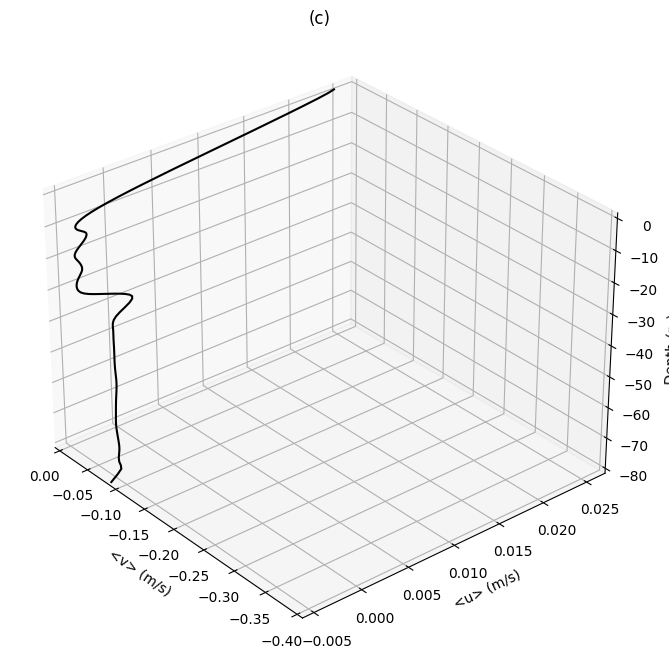

In [248]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(ds_mean_v,ds_mean_u, ds_avg.zC, color='black')

ax.set_ylabel('<u> (m/s)')
ax.set_xlabel('<v> (m/s)')
ax.set_zlabel('Depth (m)')
ax.set_zlim(-80, 0)
ax.set_xlim(0,-0.4)
ax.set_title("(c)")
ax.view_init(elev=30, azim=-40)

plt.show()

## Mean Velocities Evolution Movie

In [249]:
# Create a figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 7), sharex=True) 

# Define a function to update the plot for each frame
def update(frame):
    # plotting <u>
    ax1 = axes[0]
    ax1.cla()  # Clear the current axis
    ax1.plot(ds_mean_u, ds_avg.zC, label="$\langle u \\rangle$")
    ax1.set_ylabel('Depth (m)')
    ax1.set_ylim(-80, 0)
    ax1.legend()
    ax1.set_title("(a)")
    ax1.grid()

    # plotting <v>
    ax2 = axes[1]
    ax2.cla()  # Clear the current axis    
    ax2.plot(ds_mean_v, ds_avg.zC, label="$\langle v \\rangle$")
    ax2.set_ylabel('Depth (m)')
    ax2.set_ylim(-80, 0)
    ax2.legend()
    ax2.set_title("(b)")
    ax2.grid()
    
    # Convert time to days, hours, and minutes
    time_in_seconds = pd.to_timedelta(ds_avg.time[frame].values, unit='s')
    days = time_in_seconds.days
    hours, remainder = divmod(time_in_seconds.seconds, 3600)

    fig.title(f"t = {days}d {hours}h")

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=len(ds_avg.time), interval=100, repeat=False)

# Save the animation as a GIF
ani.save(f'images/mean-velocity-evaluation.gif', writer='pillow')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 